In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance

In [3]:
def ggen():
    comp = np.random.randint(3,8)
    print(comp)
    val = []
    xx = []
    yy = []
    for i in range(0,comp):
        x = np.random.randint(50,250)
        xx.append(x)
        y = np.random.randint(50)
        yy.append(y)
        value = np.random.normal(loc=x,scale=y,size=10000)
        val.append(list(value))
    sns.distplot(val)
    #plt.show()
    return val, comp, xx, yy

6
4


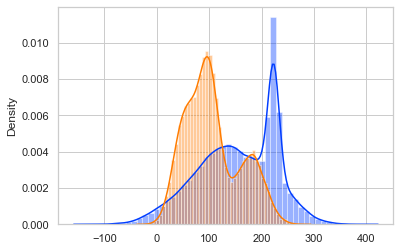

In [4]:
q1, x1 , mean1, std1 = ggen()
q2, x2 , mean2, std2 = ggen()

In [5]:

lowest_bic = np.infty
bic = []
n_components_range = range(1, 8)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        q1 = np.asarray(q1)
        q1 =q1.reshape(-1,1)
        gmm.fit(q1)
        bic.append(gmm.bic(q1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq1 = gmm
            
lowest_bic = np.infty
bic = []
n_components_range = range(1, 8)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        q2 = np.asarray(q2)
        q2 =q2.reshape(-1,1)
        gmm.fit(q2)
        bic.append(gmm.bic(q2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq2 = gmm
    

In [6]:
print(best_gmmq1.get_params())
print(best_gmmq2.get_params())
print(best_gmmq1.weights_)
print(best_gmmq2.weights_)
print(best_gmmq1.means_)
#print(mean1)
print(best_gmmq2.means_)
#print(mean2)

{'covariance_type': 'spherical', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 7, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}
{'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 3, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}
[0.14838332 0.15923889 0.05850367 0.08233121 0.17446196 0.2702879
 0.10679303]
[0.31680714 0.26176288 0.42142999]
[[180.70108865]
 [100.19380097]
 [  2.7987991 ]
 [265.09970458]
 [140.31036304]
 [222.32991074]
 [ 55.60949337]]
[[ 53.14297986]
 [179.27664789]
 [100.1886065 ]]


In [7]:
x = dict(zip(best_gmmq1.weights_,best_gmmq1.means_))
od1 = collections.OrderedDict(sorted(x.items(),reverse=True))
od1

OrderedDict([(0.27028790251384566, array([222.32991074])),
             (0.17446196139058495, array([140.31036304])),
             (0.1592388908195893, array([100.19380097])),
             (0.1483833232812753, array([180.70108865])),
             (0.10679303410343072, array([55.60949337])),
             (0.0823312136829995, array([265.09970458])),
             (0.05850367420825969, array([2.7987991]))])

In [8]:
y = dict(zip(best_gmmq2.weights_,best_gmmq2.means_))
od2 = collections.OrderedDict(sorted(y.items(),reverse=True))
od2

OrderedDict([(0.42142998748840454, array([100.1886065])),
             (0.3168071370208665, array([53.14297986])),
             (0.26176287549072985, array([179.27664789]))])

In [16]:
minsize=min(len(od1),len(od2))
od1 = dict(od1).items()
od1 = list(od1)[:minsize]
od2 = dict(od2).items()
od2 = list(od2)[:minsize]
od2

[(0.42142998748840454, array([100.1886065])),
 (0.3168071370208665, array([53.14297986])),
 (0.26176287549072985, array([179.27664789]))]

In [24]:
odw=[]
odm=[]
for i in range(len(od1)):
    odw.append(abs(od1[i][0] - od2[i][0]))
    odm.append(abs(od1[i][1][0] - od2[i][1][0]))
    

Manhattan

In [26]:
dmm = list(zip(odw,odm))
dmm

[(0.1511420849745589, 122.14130424207079),
 (0.14234517563028154, 87.1673831759421),
 (0.10252398467114054, 79.08284691755483)]

In [28]:
odw=[]
odm=[]
for i in range(len(od1)):
    odw.append(np.sqrt((od1[i][0] - od2[i][0])**2))
    odm.append(np.sqrt((od1[i][1][0] - od2[i][1][0])**2))


Euclidean

In [31]:
dme = list(zip(odw,odm))
dme

[(0.1511420849745589, 122.14130424207079),
 (0.14234517563028154, 87.1673831759421),
 (0.10252398467114054, 79.08284691755483)]

In [32]:
odd1 = []
odd2 = []
for i in range(minsize):
    odd1.append(od1[i][0] * od1[i][1][0])
    odd2.append(od2[i][0] * od2[i][1][0])
odd1 = np.asarray(odd1)
odd2 = np.asarray(odd2)


In [33]:
odd1

array([60.09308524, 24.47882114, 15.95474973])

Manhattan

In [34]:
distm = abs(odd1-odd2)
distm

array([17.87060206,  7.64274584, 30.97322113])

Euclidean

In [35]:
dist = np.sqrt((odd1 - odd2)**2)
dist

array([17.87060206,  7.64274584, 30.97322113])